# Decision Tree Algorithm

Decision Trees are a non-parametric supervised learning method used for classification and regression tasks. They are known for their simplicity and ability to model complex decision-making processes.

## Characteristics

- **Tree Structure:** Consists of root nodes, branches, and leaf nodes representing decisions and their outcomes.
- **Interpretable:** The tree can be visualized, making the model easy to understand.
- **Versatile:** Suitable for both numerical and categorical data.

## Working Mechanism

1. **Splitting:** Divides the data into subsets based on attribute value tests.
2. **Stopping Criteria:** Stops when the nodes are pure or further splitting is not beneficial.
3. **Pruning:** Often needed to reduce the size of the tree and improve its generalization.

## Applications and Limitations

- **Used in:** Customer segmentation, medical diagnosis, and more.
- **Limitations:** Prone to overfitting, sensitive to small data variations, and can be biased towards dominant classes.


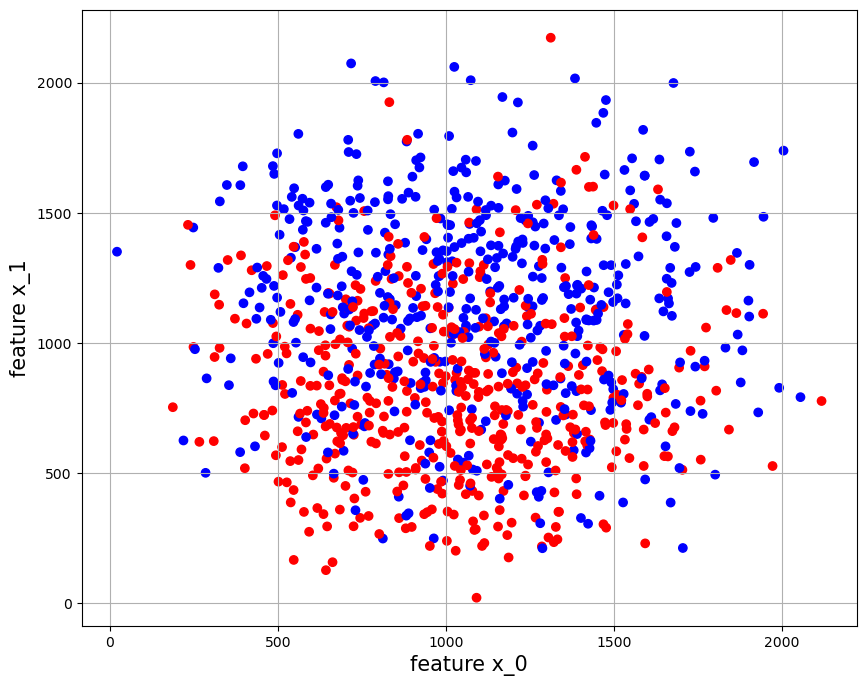

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# The artificial data will be taken from sklearn (make_moons)
from sklearn.datasets import make_moons

data = pd.read_csv('~/Downloads/KNN_Project_Data.txt', sep=",")

X = data[['XVPM', 'GWYH']].values  # Replace with your actual feature column names
y = data['TARGET CLASS']  # Replace with your actual target column name

colors = ["red" if label == 1 else "blue" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

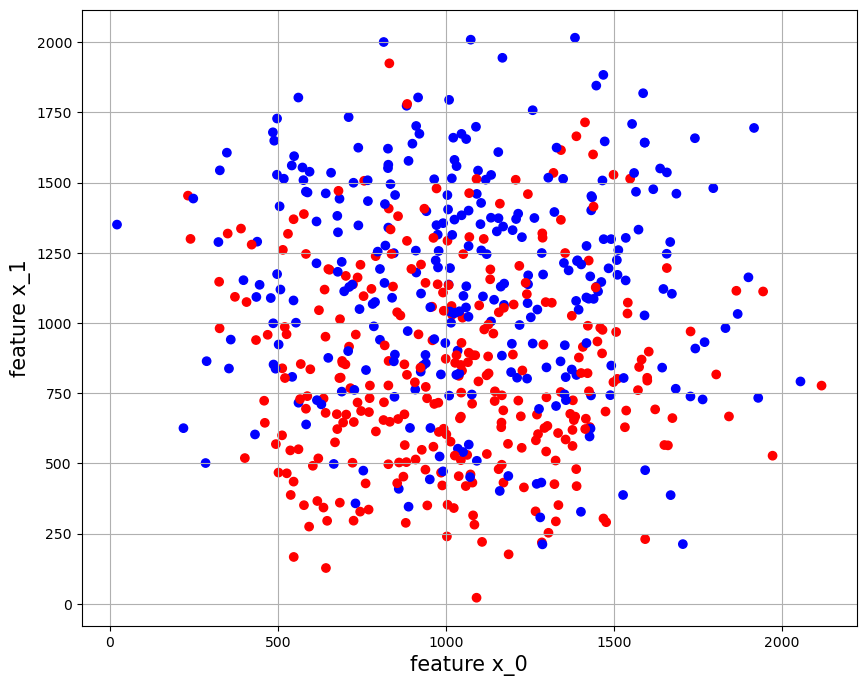

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == 1 else "blue" for label in y_train]
c_test = ["red" if label == 1 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- x_1 <= 986.95
|   |--- x_1 <= 724.95
|   |   |--- x_0 <= 343.10
|   |   |   |--- class: 0
|   |   |--- x_0 >  343.10
|   |   |   |--- x_1 <= 641.59
|   |   |   |   |--- x_0 <= 1394.81
|   |   |   |   |   |--- x_1 <= 626.12
|   |   |   |   |   |   |--- x_0 <= 1289.69
|   |   |   |   |   |   |   |--- x_0 <= 1268.43
|   |   |   |   |   |   |   |   |--- x_1 <= 344.33
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- x_1 >  344.33
|   |   |   |   |   |   |   |   |   |--- x_1 <= 348.11
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- x_1 >  348.11
|   |   |   |   |   |   |   |   |   |   |--- x_0 <= 642.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- x_0 >  642.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |--- x_0 >  1268.43
|   |   |   |   |   |   |   |   |--- x_1 <= 

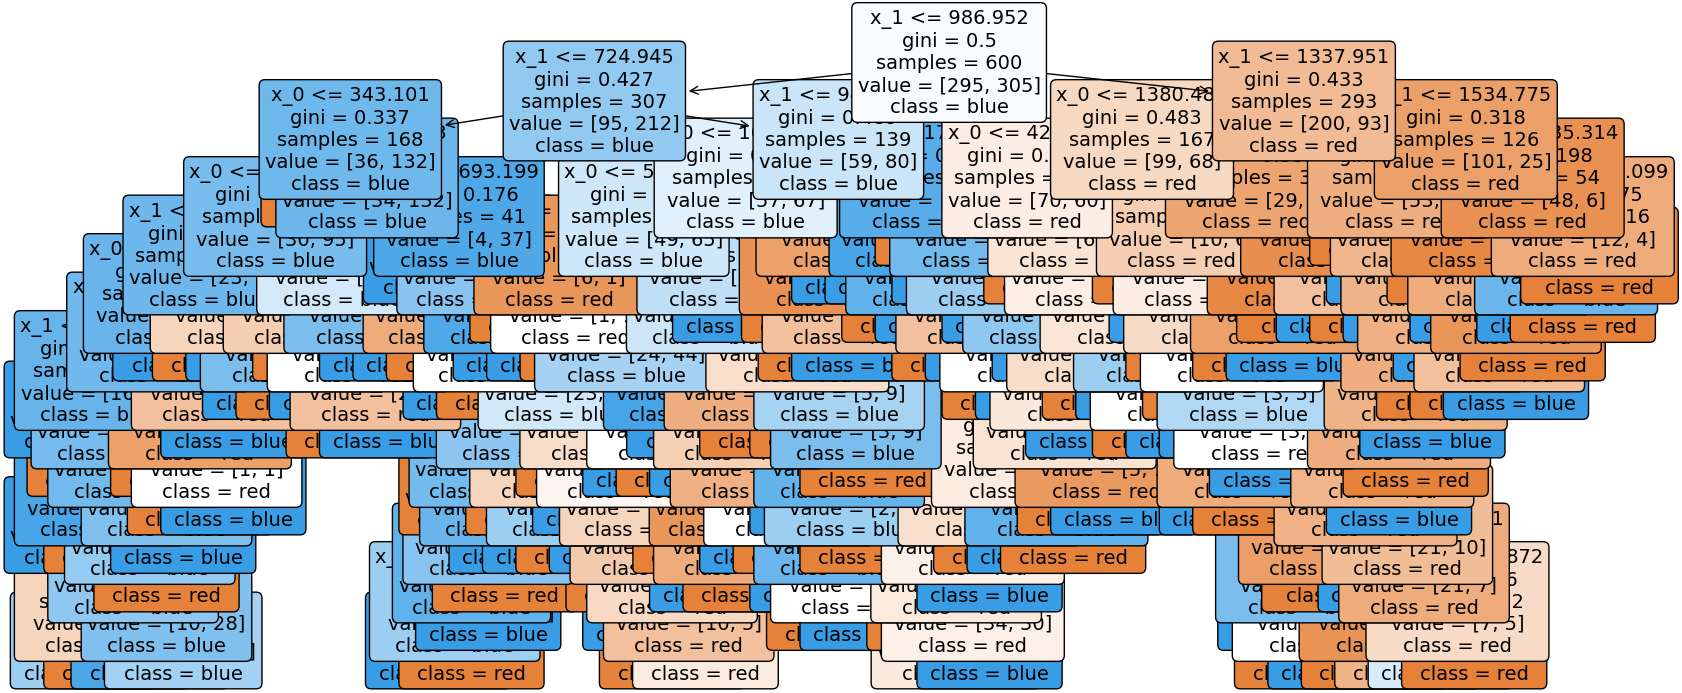

In [4]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

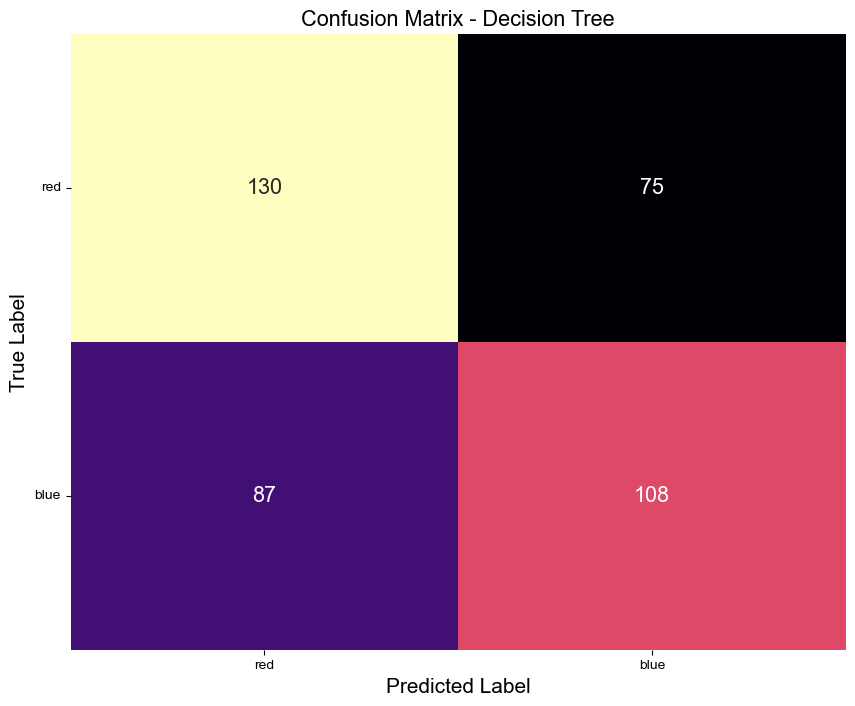

In [5]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()


In [6]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62       205
           1       0.59      0.55      0.57       195

    accuracy                           0.59       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.59      0.59       400



# Regression Tree Algorithm

Regression Trees are a type of decision tree used in regression problems to predict continuous outcomes. They are a part of the CART (Classification And Regression Trees) methodology.

## Characteristics

- **Continuous Prediction:** Aimed at predicting a continuous response variable.
- **Hierarchical Structure:** Comprises root, internal, and leaf nodes, with each leaf node representing a numerical value.
- **Splitting Based on Variance:** Nodes are split to minimize variance in the target variable.

## Mechanism

1. **Starts with Root:** The entire dataset is the root of the tree.
2. **Binary Splitting:** Each node is split into two to minimize the variance.
3. **Stopping Criteria:** Splitting continues until certain conditions are met.
4. **Output Prediction:** The prediction for an input is the mean value at the corresponding leaf node.

## Applications

- Used in sectors like real estate, finance, and healthcare for continuous outcome predictions.

## Limitations

- Prone to overfitting and sensitive to changes in the data.
- Not capable of extrapolating beyond the range of the training data.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
X, y = df.iloc[:, 2:7], df.iloc[:,8]

In [9]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [10]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.009646575481386836 

MSE reg2: 0.009491999999999999 



In [11]:
reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.009646575481386855 

MSE reg2: 0.008957 

